# Dicoding Submission - arda24

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf

2024-10-20 10:50:10.859738: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-20 10:50:10.863032: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-20 10:50:10.873260: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 10:50:10.890299: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 10:50:10.895426: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-20 10:50:10.906939: I tensorflow/core/platform/cpu_feature_gu

## EDA

In [2]:
df = pd.read_csv("output_polarity_analysis/part-00000-fa27a05a-939d-4362-8dbd-0654cbba093b-c000.csv")
df.head(2)

,final_sentence,polarity
0,crowd goe home,neutral
1,song bad cocomelon make better one,negative


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306778 entries, 0 to 306777
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   final_sentence  301101 non-null  object
 1   polarity        306778 non-null  object
dtypes: object(2)
memory usage: 4.7+ MB


In [4]:
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301101 entries, 0 to 306777
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   final_sentence  301101 non-null  object
 1   polarity        301101 non-null  object
dtypes: object(2)
memory usage: 6.9+ MB


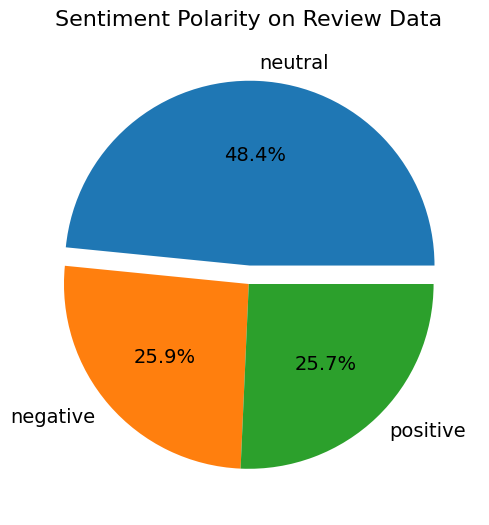

In [6]:
# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'df' dan menyimpannya dalam list 'sizes'.
sizes = df['polarity'].value_counts().tolist()

# Mengambil label atau kategori sentimen dari DataFrame 'df' dan menyimpannya dalam list 'labels'.
labels = df['polarity'].value_counts().index.tolist()

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
explode = (0.1, 0, 0)  # Memisahkan potongan negatif (jika ada)

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()


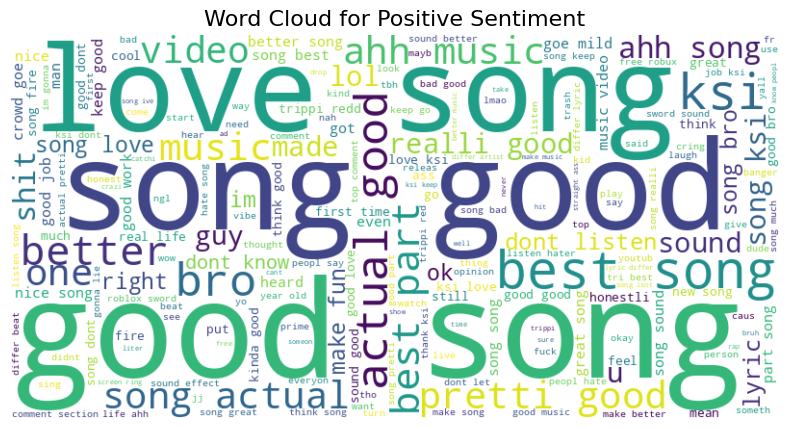

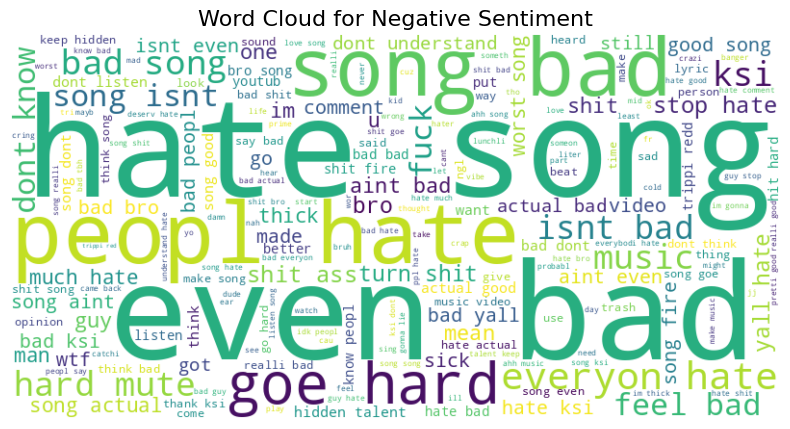

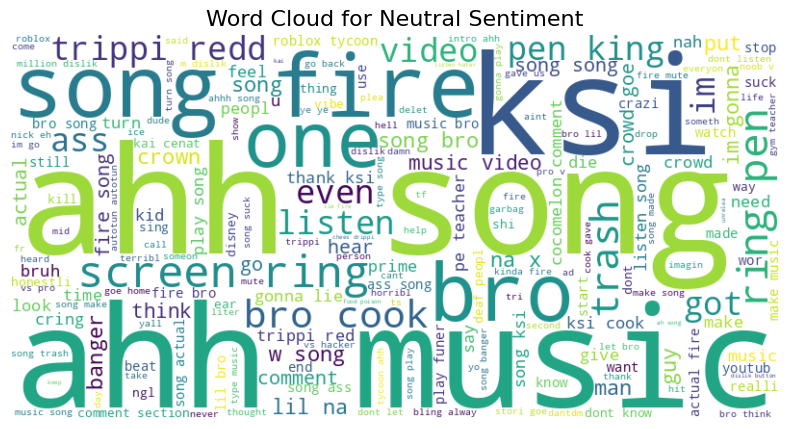

In [7]:
# Mendefinisikan fungsi untuk membuat word cloud berdasarkan polaritas.
def create_wordcloud_by_polarity(df, polarity):
    # Mengambil kalimat yang sesuai dengan polaritas yang diberikan.
    text = ' '.join(df[df['polarity'] == polarity]['final_sentence'].dropna().astype(str))
    
    # Membuat objek WordCloud.
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Membuat plot untuk menampilkan word cloud.
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Menghilangkan sumbu
    plt.title(f'Word Cloud for {polarity.capitalize()} Sentiment', fontsize=16)
    plt.show()

# Membuat word cloud untuk masing-masing polaritas
create_wordcloud_by_polarity(df, 'positive')
create_wordcloud_by_polarity(df, 'negative')
create_wordcloud_by_polarity(df, 'neutral')

## Feature Extraction

In [8]:
# Pisahkan data menjadi fitur dan label
X = df['final_sentence']
y = df['polarity']

In [9]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [10]:
# Ekstraksi fitur dengan HashingVectorizer
count_vectorizer = CountVectorizer(max_features=200, min_df=17, max_df=0.8)
X_count = count_vectorizer.fit_transform(X)

In [11]:
# Konversi hasil ekstraksi fitur TF-IDF menjadi dataframe
features_df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df_tfidf

,actual,ad,ahh,aint,alway,amaz,ass,back,bad,banger,...,where,work,wors,worst,wrong,yall,year,yo,your,youtub
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
1,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.322213,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
2,0.54737,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.283672,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301096,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
301097,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
301098,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0
301099,0.00000,0.0,0.0,0.0,0.0,0.0,0.758289,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0


In [12]:
# Konversi hasil ekstraksi fitur Count Vectorizer menjadi dataframe
features_df_count_vectorizer = pd.DataFrame.sparse.from_spmatrix(X_count, columns=count_vectorizer.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df_count_vectorizer

,actual,ad,ahh,aint,alway,amaz,ass,back,bad,banger,...,where,work,wors,worst,wrong,yall,year,yo,your,youtub
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
301097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
301098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
301099,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Split

In [13]:
# Bagi data menjadi data latih dan data uji pada ekstrasi fitur TF-IDF
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [14]:
# Bagi data menjadi data latih dan data uji pada ekstrasi fitur Count Vectorizer
X_count_vectorizer_train, X_count_vectorizer_test, y_count_vectorizer_train, y_count_vectorizer_test = train_test_split(X_count, y, test_size=0.3, random_state=42)

## Training

In [15]:
# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes_tfidf = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes_tfidf.fit(X_tfidf_train.toarray(), y_tfidf_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb_tfidf = naive_bayes_tfidf.predict(X_tfidf_train.toarray())
y_pred_test_nb_tfidf = naive_bayes_tfidf.predict(X_tfidf_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb_tfidf = accuracy_score(y_pred_train_nb_tfidf, y_tfidf_train)
accuracy_test_nb_tfidf = accuracy_score(y_pred_test_nb_tfidf, y_tfidf_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb_tfidf)
print('Naive Bayes - accuracy_test:', accuracy_test_nb_tfidf)

Naive Bayes - accuracy_train: 0.88118980405181
Naive Bayes - accuracy_test: 0.8781820295245845


In [16]:
# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes_count_vectorizer = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes_count_vectorizer.fit(X_count_vectorizer_train.toarray(), y_count_vectorizer_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb_count_vectorizer = naive_bayes_count_vectorizer.predict(X_count_vectorizer_train.toarray())
y_pred_test_nb_count_vectorizer = naive_bayes_count_vectorizer.predict(X_count_vectorizer_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb_count_vectorizer = accuracy_score(y_pred_train_nb_count_vectorizer, y_count_vectorizer_train)
accuracy_test_nb_count_vectorizer = accuracy_score(y_pred_test_nb_count_vectorizer, y_count_vectorizer_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb_count_vectorizer)
print('Naive Bayes - accuracy_test:', accuracy_test_nb_count_vectorizer)

Naive Bayes - accuracy_train: 0.8810172225648811
Naive Bayes - accuracy_test: 0.879487662042931


In [17]:
# Membuat objek model Logistic Regression
logistic_regression_tfidf = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression_tfidf.fit(X_tfidf_train.toarray(), y_tfidf_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr_tfidf = logistic_regression_tfidf.predict(X_tfidf_train.toarray())
y_pred_test_lr_tfidf = logistic_regression_tfidf.predict(X_tfidf_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr_tfidf = accuracy_score(y_pred_train_lr_tfidf, y_tfidf_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr_tfidf = accuracy_score(y_pred_test_lr_tfidf, y_tfidf_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr_tfidf)
print('Logistic Regression - accuracy_test:', accuracy_test_lr_tfidf)

Logistic Regression - accuracy_train: 0.9180214214546663
Logistic Regression - accuracy_test: 0.9159927600006642


In [18]:
# Membuat objek model Logistic Regression
logistic_regression_count_vectorizer = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression_count_vectorizer.fit(X_count_vectorizer_train.toarray(), y_count_vectorizer_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr_count_vectorizer = logistic_regression_count_vectorizer.predict(X_count_vectorizer_train.toarray())
y_pred_test_lr_count_vectorizer = logistic_regression_count_vectorizer.predict(X_count_vectorizer_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr_count_vectorizer = accuracy_score(y_pred_train_lr_count_vectorizer, y_count_vectorizer_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr_count_vectorizer = accuracy_score(y_pred_test_lr_count_vectorizer, y_count_vectorizer_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr_count_vectorizer)
print('Logistic Regression - accuracy_test:', accuracy_test_lr_count_vectorizer)

Logistic Regression - accuracy_train: 0.918570005218959
Logistic Regression - accuracy_test: 0.9172266442306628


In [19]:
# Membuat objek model Decision Tree
decision_tree_tfidf = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree_tfidf.fit(X_tfidf_train.toarray(), y_tfidf_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt_tfidf = decision_tree_tfidf.predict(X_tfidf_train.toarray())
y_pred_test_dt_tfidf = decision_tree_tfidf.predict(X_tfidf_test.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt_tfidf = accuracy_score(y_pred_train_dt_tfidf, y_tfidf_train)
accuracy_test_dt_tfidf = accuracy_score(y_pred_test_dt_tfidf, y_tfidf_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt_tfidf)
print('Decision Tree - accuracy_test:', accuracy_test_dt_tfidf)

Decision Tree - accuracy_train: 0.9559739289272667
Decision Tree - accuracy_test: 0.8955679912322944


In [20]:
# Membuat objek model Decision Tree
decision_tree_count_vectorizer = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree_count_vectorizer.fit(X_count_vectorizer_train.toarray(), y_count_vectorizer_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt_count_vectorizer = decision_tree_count_vectorizer.predict(X_count_vectorizer_train.toarray())
y_pred_test_dt_count_vectorizer = decision_tree_count_vectorizer.predict(X_count_vectorizer_test.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt_count_vectorizer = accuracy_score(y_pred_train_dt_count_vectorizer, y_count_vectorizer_train)
accuracy_test_dt_count_vectorizer = accuracy_score(y_pred_test_dt_count_vectorizer, y_count_vectorizer_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt_count_vectorizer)
print('Decision Tree - accuracy_test:', accuracy_test_dt_count_vectorizer)

Decision Tree - accuracy_train: 0.9566209612373677
Decision Tree - accuracy_test: 0.8932260242884502


In [21]:
# Membuat objek model Random Forest
random_forest_tfidf = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest_tfidf.fit(X_tfidf_train.toarray(), y_tfidf_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf_tfidf = random_forest_tfidf.predict(X_tfidf_train.toarray())
y_pred_test_rf_tfidf = random_forest_tfidf.predict(X_tfidf_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf_tfidf = accuracy_score(y_pred_train_rf_tfidf, y_tfidf_train)
accuracy_test_rf_tfidf = accuracy_score(y_pred_test_rf_tfidf, y_tfidf_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf_tfidf)
print('Random Forest - accuracy_test:', accuracy_test_rf_tfidf)

Random Forest - accuracy_train: 0.9559656260378612
Random Forest - accuracy_test: 0.9140997326514007


In [22]:
# Membuat objek model Random Forest
random_forest_count_vectorizer = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest_count_vectorizer.fit(X_count_vectorizer_train.toarray(), y_count_vectorizer_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf_count_vectorizer = random_forest_count_vectorizer.predict(X_count_vectorizer_train.toarray())
y_pred_test_rf_count_vectorizer = random_forest_count_vectorizer.predict(X_count_vectorizer_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf_count_vectorizer = accuracy_score(y_pred_train_rf_count_vectorizer, y_count_vectorizer_train)
accuracy_test_rf_count_vectorizer = accuracy_score(y_pred_test_rf_count_vectorizer, y_count_vectorizer_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf_count_vectorizer)
print('Random Forest - accuracy_test:', accuracy_test_rf_count_vectorizer)

Random Forest - accuracy_train: 0.9566209612373677
Random Forest - accuracy_test: 0.9120235578040761


In [23]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92:
            print(f"\nEpoch {epoch + 1}: Reached 92% accuracy and validation accuracy, stopping training.")
            self.model.stop_training = True

In [24]:
def create_cnn1d_model(X_train, y_train, X_test, y_test):
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
    y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

    if hasattr(X_train, "toarray"):
        X_train = X_train.toarray()
    if hasattr(X_test, "toarray"):
        X_test = X_test.toarray()

    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(3, activation='softmax'),
    ])

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=32,
        epochs=50,
        callbacks=[CustomCallback()],
        verbose=1 
    )

    model.summary()
    return model

In [25]:
model_cnn1d_tfidf = create_cnn1d_model(X_tfidf_train, y_tfidf_train, X_tfidf_test, y_tfidf_test)
model_cnn1d_count_vectorizer = create_cnn1d_model(X_count_vectorizer_train, y_count_vectorizer_train, X_count_vectorizer_test, y_count_vectorizer_test)

/home/macreai/miniconda3/envs/dicoding-sentiment-analysis/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1729397041.576313    6030 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-20 11:04:01.577082: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and

Epoch 1/50


2024-10-20 11:04:01.843858: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 192704000 exceeds 10% of free system memory.


7528/7528 ━━━━━━━━━━━━━━━━━━━━ 91s 12ms/step - accuracy: 0.8736 - loss: 0.4041 - val_accuracy: 0.9149 - val_loss: 0.3053
Epoch 2/50
7528/7528 ━━━━━━━━━━━━━━━━━━━━ 92s 12ms/step - accuracy: 0.9143 - loss: 0.3102 - val_accuracy: 0.9160 - val_loss: 0.2996
Epoch 3/50
7528/7528 ━━━━━━━━━━━━━━━━━━━━ 86s 11ms/step - accuracy: 0.9146 - loss: 0.3067 - val_accuracy: 0.9161 - val_loss: 0.2966
Epoch 4/50
7528/7528 ━━━━━━━━━━━━━━━━━━━━ 80s 11ms/step - accuracy: 0.9168 - loss: 0.2992 - val_accuracy: 0.9172 - val_loss: 0.2953
Epoch 5/50
7528/7528 ━━━━━━━━━━━━━━━━━━━━ 80s 11ms/step - accuracy: 0.9172 - loss: 0.2946 - val_accuracy: 0.9171 - val_loss: 0.2949
Epoch 6/50
7528/7528 ━━━━━━━━━━━━━━━━━━━━ 80s 11ms/step - accuracy: 0.9166 - loss: 0.2982 - val_accuracy: 0.9171 - val_loss: 0.2947
Epoch 7/50
7528/7528 ━━━━━━━━━━━━━━━━━━━━ 79s 11ms/step - accuracy: 0.9167 - loss: 0.2944 - val_accuracy: 0.9179 - val_loss: 0.2913
Epoch 8/50
7528/7528 ━━━━━━━━━━━━━━━━━━━━ 80s 11ms/step - accuracy: 0.9175 - loss: 0.29

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 198, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 99, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3168)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       405,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,218,443 (4.65 MB)

 Trainable params: 406,147 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 812,296 (3.10 MB)

/home/macreai/miniconda3/envs/dicoding-sentiment-analysis/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


2024-10-20 12:27:27.124612: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 337232000 exceeds 10% of free system memory.


6584/6587 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8782 - loss: 0.4171

2024-10-20 12:28:21.939860: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 144529600 exceeds 10% of free system memory.


6587/6587 ━━━━━━━━━━━━━━━━━━━━ 60s 9ms/step - accuracy: 0.8782 - loss: 0.4171 - val_accuracy: 0.9154 - val_loss: 0.3054
Epoch 2/50
6587/6587 ━━━━━━━━━━━━━━━━━━━━ 59s 9ms/step - accuracy: 0.9139 - loss: 0.3195 - val_accuracy: 0.9170 - val_loss: 0.2978
Epoch 3/50
6587/6587 ━━━━━━━━━━━━━━━━━━━━ 59s 9ms/step - accuracy: 0.9156 - loss: 0.3068 - val_accuracy: 0.9167 - val_loss: 0.2956
Epoch 4/50
6587/6587 ━━━━━━━━━━━━━━━━━━━━ 59s 9ms/step - accuracy: 0.9175 - loss: 0.2995 - val_accuracy: 0.9177 - val_loss: 0.2940
Epoch 5/50
6587/6587 ━━━━━━━━━━━━━━━━━━━━ 59s 9ms/step - accuracy: 0.9165 - loss: 0.3007 - val_accuracy: 0.9177 - val_loss: 0.2915
Epoch 6/50
6587/6587 ━━━━━━━━━━━━━━━━━━━━ 59s 9ms/step - accuracy: 0.9176 - loss: 0.2943 - val_accuracy: 0.9180 - val_loss: 0.2916
Epoch 7/50
6587/6587 ━━━━━━━━━━━━━━━━━━━━ 58s 9ms/step - accuracy: 0.9176 - loss: 0.2944 - val_accuracy: 0.9179 - val_loss: 0.2913
Epoch 8/50
6587/6587 ━━━━━━━━━━━━━━━━━━━━ 59s 9ms/step - accuracy: 0.9175 - loss: 0.2923 - val

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 198, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 99, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3168)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       405,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,218,443 (4.65 MB)

 Trainable params: 406,147 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 812,296 (3.10 MB)

In [26]:
def create_dense_model(X_train, y_train, X_test, y_test):
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
    y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

    if hasattr(X_train, "toarray"):
        X_train = X_train.toarray()
    if hasattr(X_test, "toarray"):
        X_test = X_test.toarray()

    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(X_train.shape[1],)),  
        tf.keras.layers.Dense(128, activation='relu'),     
        tf.keras.layers.Dropout(0.5),                     
        tf.keras.layers.Dense(64, activation='relu'),     
        tf.keras.layers.Dense(3, activation='softmax'),   
    ])

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=32,
        epochs=50,
        callbacks=[CustomCallback()],
        verbose=1 
    )

    model.summary()
    return model

In [27]:
model_dense_tfidf = create_dense_model(X_tfidf_train, y_tfidf_train, X_tfidf_test, y_tfidf_test)
model_dense_count_vectorizer = create_dense_model(X_count_vectorizer_train, y_count_vectorizer_train, X_count_vectorizer_test, y_count_vectorizer_test)

Epoch 1/50


2024-10-20 13:17:26.897839: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 192704000 exceeds 10% of free system memory.


7528/7528 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.8710 - loss: 0.3974 - val_accuracy: 0.9177 - val_loss: 0.2921
Epoch 2/50
7528/7528 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.9187 - loss: 0.2896 - val_accuracy: 0.9184 - val_loss: 0.2879
Epoch 3/50
7528/7528 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9178 - loss: 0.2896 - val_accuracy: 0.9188 - val_loss: 0.2862
Epoch 4/50
7528/7528 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9197 - loss: 0.2827 - val_accuracy: 0.9188 - val_loss: 0.2856
Epoch 5/50
7528/7528 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9205 - loss: 0.2819 - val_accuracy: 0.9188 - val_loss: 0.2855
Epoch 6/50
7528/7528 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9205 - loss: 0.2801 - val_accuracy: 0.9193 - val_loss: 0.2850
Epoch 7/50
7528/7528 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9217 - loss: 0.2766 - val_accuracy: 0.9194 - val_loss: 0.2843
Epoch 8/50
7528/7528 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9195 - loss: 0.2813 - val

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,539 (400.55 KB)

 Trainable params: 34,179 (133.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 68,360 (267.04 KB)

Epoch 1/50


2024-10-20 13:27:29.815455: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 337232000 exceeds 10% of free system memory.


6587/6587 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.8721 - loss: 0.4090 - val_accuracy: 0.9188 - val_loss: 0.2901
Epoch 2/50
6587/6587 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9180 - loss: 0.2942 - val_accuracy: 0.9193 - val_loss: 0.2874
Epoch 3/50
6587/6587 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9193 - loss: 0.2884 - val_accuracy: 0.9192 - val_loss: 0.2847
Epoch 4/50
6587/6587 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9200 - loss: 0.2841 - val_accuracy: 0.9196 - val_loss: 0.2840
Epoch 5/50
6550/6587 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9185 - loss: 0.2865
Epoch 5: Reached 92% accuracy and validation accuracy, stopping training.
6587/6587 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9185 - loss: 0.2864 - val_accuracy: 0.9201 - val_loss: 0.2836


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 128)            │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,539 (400.55 KB)

 Trainable params: 34,179 (133.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 68,360 (267.04 KB)

## Inference

In [30]:
label_encoder = LabelEncoder()
encoded_label_encoder = label_encoder.fit_transform(y_count_vectorizer_train)

In [36]:
new_data = ["bad song cocomelon better"]

X_new_count = count_vectorizer.transform(new_data)

predictions_count = model_dense_count_vectorizer.predict(X_new_count)

predicted_class_count = predictions_count.argmax(axis=1)

original_classes = label_encoder.classes_
print("Label asli:", original_classes)

if predicted_class_count == [0]:
    print("negative")
elif predicted_class_count == [1]:
    print("neutral")
else:
    print("positive")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Label asli: ['negative' 'neutral' 'positive']
negative


In [37]:
new_data = ["ahh song"]

X_new_count = count_vectorizer.transform(new_data)

predictions_count = model_dense_count_vectorizer.predict(X_new_count)

predicted_class_count = predictions_count.argmax(axis=1)

original_classes = label_encoder.classes_
print("Label asli:", original_classes)

if predicted_class_count == [0]:
    print("negative")
elif predicted_class_count == [1]:
    print("neutral")
else:
    print("positive")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Label asli: ['negative' 'neutral' 'positive']
neutral


In [40]:
new_data = ["good song"]

X_new_count = count_vectorizer.transform(new_data)

predictions_count = model_dense_count_vectorizer.predict(X_new_count)

predicted_class_count = predictions_count.argmax(axis=1)

original_classes = label_encoder.classes_
print("Label asli:", original_classes)

if predicted_class_count == [0]:
    print("negative")
elif predicted_class_count == [1]:
    print("neutral")
else:
    print("positive")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Label asli: ['negative' 'neutral' 'positive']
positive
